# Python Placement Assignment Answers

## Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.

Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding

Insights to be drawn -

- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- Get all Pokemon who have more than two types of capabilities


<Axes: title={'center': 'Get all Pokemons whose spawn rate is less than 5%'}, xlabel='name', ylabel='avg_spawns'>

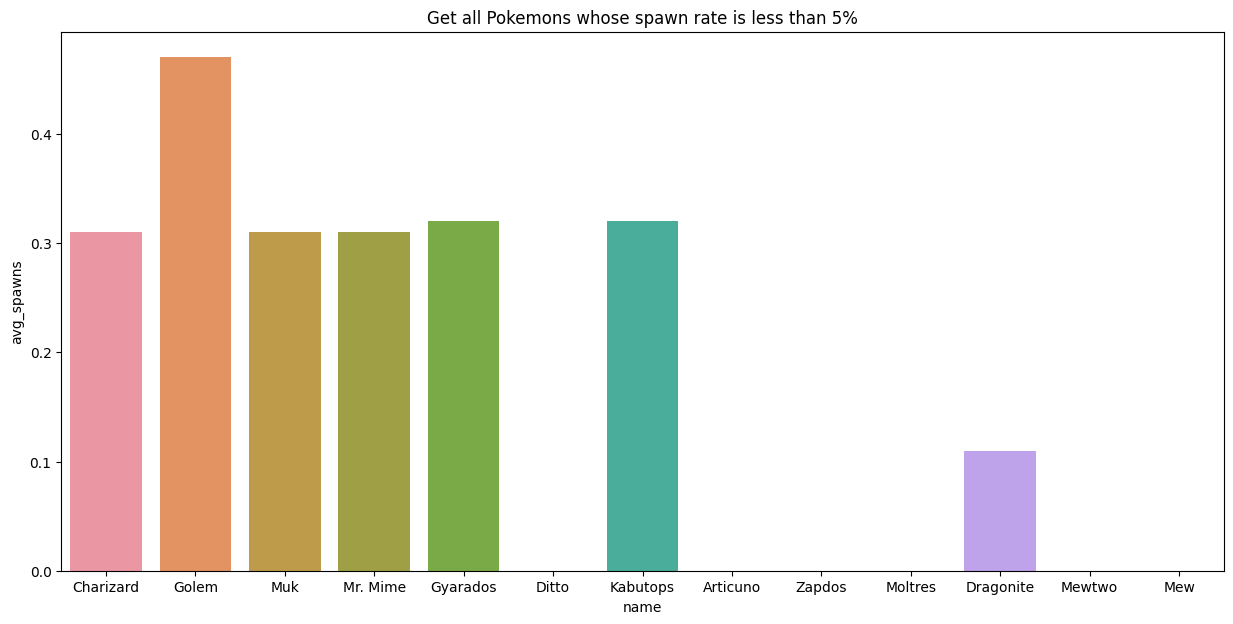

In [1]:
# for  better visualizations use matplotlib and seaborn
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_excel('pokemon.xlsx')
data.head()
less_spawn = data[data["avg_spawns"] < 0.5]
plt.figure(figsize=(15,7))
plt.title("Get all Pokemons whose spawn rate is less than 5%")
sns.barplot(x = "name",y="avg_spawns",data=less_spawn)

In [2]:
# Get all Pokemons that have less than 4 weaknesses
# use ast liabery to convert in string to list and then fatch the len for wekness less then 4
data["weaknesses"] = data["weaknesses"].apply(ast.literal_eval)
weknessless4 = data[data['weaknesses'].apply(lambda x: len(x) < 4)]
weknessless4.loc[:,["name","weaknesses"]]

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


In [3]:
# Get all Pokemons that have no multipliers at all
data["multipliers"] = data["multipliers"].str.extract(r'\[([\d.]+)\]').astype(float)
no_multipliers = data[data["multipliers"].isnull()]
no_multipliers.loc[:,["name","multipliers"]]

,name,multipliers
1,Ivysaur,NaN
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
10,Metapod,NaN
...,...,...
145,Moltres,NaN
146,Dratini,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


In [4]:
# Get all Pokemons that do not have more than 2 evolutions
evolution = data["next_evolution"].dropna().apply(ast.literal_eval).apply(lambda x: [evolution['name'] for evolution in x])

In [5]:
for i in evolution:
    if len(i) <=2:
        print(i)

['Ivysaur', 'Venusaur']
['Venusaur']
['Charmeleon', 'Charizard']
['Charizard']
['Wartortle', 'Blastoise']
['Blastoise']
['Metapod', 'Butterfree']
['Butterfree']
['Kakuna', 'Beedrill']
['Beedrill']
['Pidgeotto', 'Pidgeot']
['Pidgeot']
['Raticate']
['Fearow']
['Arbok']
['Raichu']
['Sandslash']
['Nidorina', 'Nidoqueen']
['Nidoqueen']
['Nidorino', 'Nidoking']
['Nidoking']
['Clefable']
['Ninetales']
['Wigglytuff']
['Golbat']
['Gloom', 'Vileplume']
['Vileplume']
['Parasect']
['Venomoth']
['Dugtrio']
['Persian']
['Golduck']
['Primeape']
['Arcanine']
['Poliwhirl', 'Poliwrath']
['Poliwrath']
['Kadabra', 'Alakazam']
['Alakazam']
['Machoke', 'Machamp']
['Machamp']
['Weepinbell', 'Victreebel']
['Victreebel']
['Tentacruel']
['Graveler', 'Golem']
['Golem']
['Rapidash']
['Slowbro']
['Magneton']
['Dodrio']
['Dewgong']
['Muk']
['Cloyster']
['Haunter', 'Gengar']
['Gengar']
['Hypno']
['Kingler']
['Electrode']
['Exeggutor']
['Marowak']
['Weezing']
['Rhydon']
['Seadra']
['Seaking']
['Starmie']
['Gyarados']

In [6]:
# Get all Pokemons whose spawn time is less than 300 seconds.
data["spawn_time"] = pd.to_datetime(data["spawn_time"],format='%H:%M')
threshold = pd.Timedelta(seconds=300)
spawn_time = data[data['spawn_time'].diff() < threshold]
spawn_time.loc[:,["name"]]

,name
1,Ivysaur
3,Charmander
5,Charizard
6,Squirtle
8,Blastoise
...,...
136,Porygon
138,Omastar
139,Kabuto
141,Aerodactyl
